In [72]:
pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-6es6taru
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-6es6taru
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [73]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append("..")

In [74]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "/kaggle/input/segment-anything-models/sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.9,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=120,  # Requires open-cv to run post-processing
)

predictor = SamPredictor(sam)

In [75]:
def disp_annotations(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.5)))

In [76]:
def in_point_disp(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='red', marker='o', s=80, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='o', s=80, edgecolor='white', linewidth=1.25)  


In [77]:
def mask_disp(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=1)
    else:
        color = np.array([200/255, 0/255, 0/255, 0.9])
        #color = np.array([0.5, 0.8, 1, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    #mask_image = mask.reshape(h, w, 1)
    #mask_image = 255 - mask_image
    
    ax.imshow(mask_image)

In [78]:

def plot_res(title,image,specific_point):
    input_label = np.array([1])

    masks = mask_generator_2.generate(image)
 
    predictor.set_image(image)
    masks_p, scores, logits = predictor.predict(
    point_coords=specific_point,
    point_labels=input_label,
    multimask_output=True,)
    
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(13,5))
    #fig.suptitle(f'{title} tumor')
    plt.axis('off')
    ax1.imshow(image)
    ax1.title.set_text("Image")
    ax2.imshow(image)
    ax2.title.set_text("Everything")
    disp_annotations(masks, ax2)
    for i, (mask, score) in enumerate(zip(masks_p, scores)):
        if i==0:
            ax3.imshow(image)
            mask_disp(mask, ax3)
            ax3.title.set_text(f"SAM Seg Acc: {score:.3f}")
    for ax in fig.get_axes():
        ax.label_outer()
        ax.axis('off')

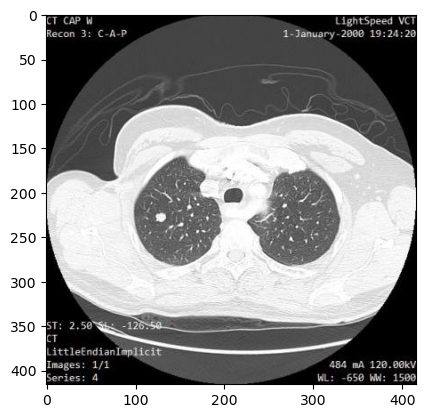

In [79]:

image =cv2.imread('/kaggle/input/dssamnew1/288 orig.jpg')
plt.imshow(image)

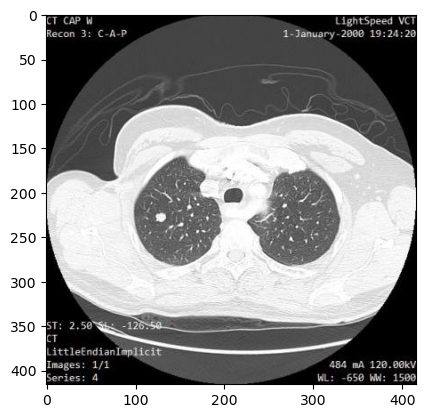

In [81]:

image =cv2.imread('/kaggle/input/dssamnew1/288 orig.jpg')
plt.imshow(image)

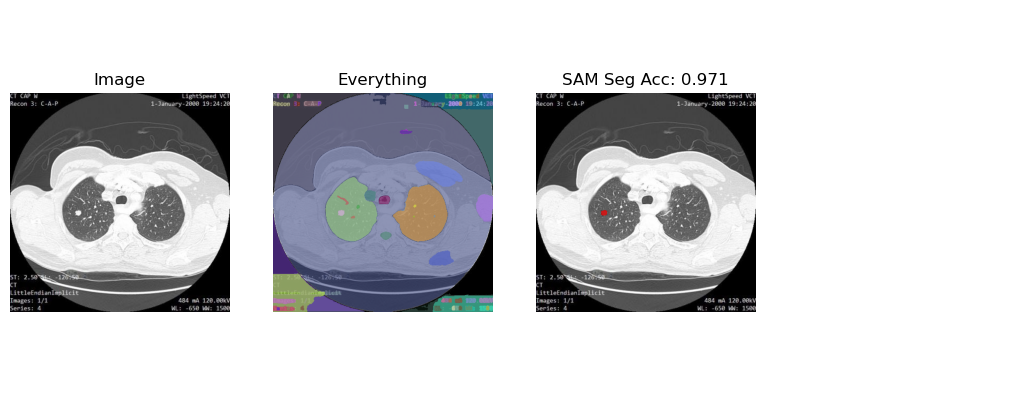

In [82]:
image = cv2.cvtColor(cv2.imread('/kaggle/input/dssamnew1/288 orig.jpg'), cv2.COLOR_BGR2RGB)

plot_res("Lung",image)

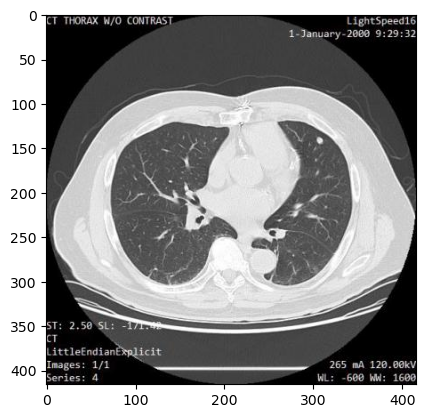

In [83]:
image =cv2.imread('/kaggle/input/dssamnew1/292.jpg')
plt.imshow(image)

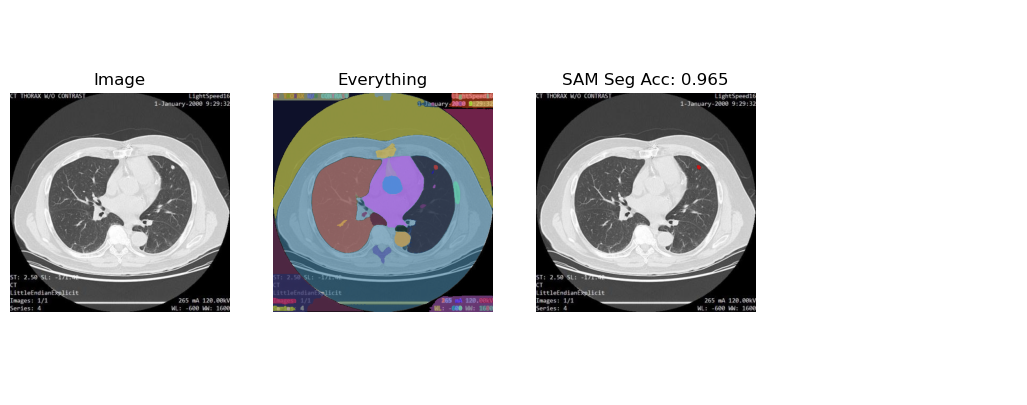

In [84]:
image = cv2.cvtColor(cv2.imread('/kaggle/input/dssamnew1/292.jpg'), cv2.COLOR_BGR2RGB)

plot_res("Lung",image)

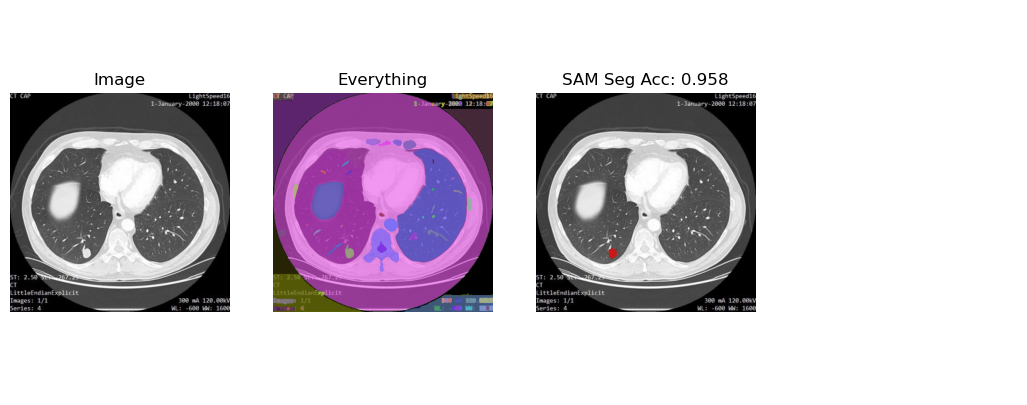

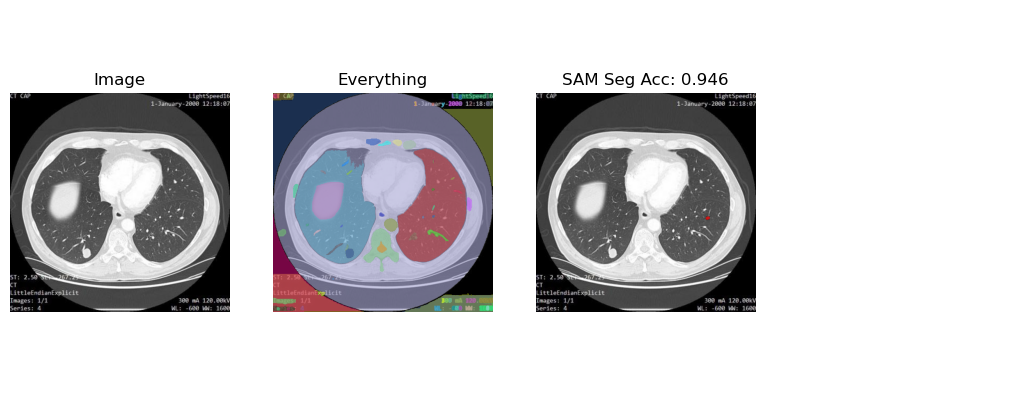

In [85]:
image = cv2.cvtColor(cv2.imread('/kaggle/input/dsmultiple/281.jpg'), cv2.COLOR_BGR2RGB)
plot_res("Lung",image)
plot_res("Lung",image)